

# Project: Investigate the TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


A community-built movie and television database is called The Movie Database (TMDb).every piece of information has been supplied by our incredible community. We are really pleased of TMDb's strong worldwide focus and data breadth, which are generally unmatched. Simply said, we breathe community, and it is what distinguishes us from other organisations.
This presentation will provide answers to a variety of topics for those who are interested, based on this dataset.


### Question(s) for Analysis
1:  Trying to prove that there is a relationship or not between the success of the film and its production budget?

2: And also, an attempt to look between the films with the highest revenues and the least, and compare them

3: Which month saw the most movie releases over the years?

4: Knowing the number of films that were produced between 1960 and 2015, and knowing in which year the largest number of films were produced.

5: Trying to understanding the typical runtime of movies

In [111]:
#loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Reading the Data:
Inspecting the 5 first rows from the Data

The first five rows of the TMdb dataset are shown here. Let's examine each column. Each row-entry has an id column with a unique value associated to it that, when turned on its side, indicates a movie. Different columns, such budget and income, describe other financial values. Other columns include details about the movie's genre, its production firms, its release date, and the opinions of the audience.

In [112]:
# Load data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### the shape of data:
The TMdb dataset consists of 10866 rows and 21 columns.

In [113]:
df.shape

(10866, 21)

### data frame informathion

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 ### data frame discribtion:
 For each column from the dataset, basic descriptive statistics are supplied in this section.

In [115]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



# Data Cleaning
A simple data cleansing will be done in this section. The cells below will use the columns that were chosen for the preprocessing.

 

### Check for duplicated rows:
here i find that we have one duplicate row.

In [116]:
df.duplicated().sum()

1

### drop these duplicated rows.
so i delete the duplicate row, and check if it deleted

In [117]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

###  remove the unused colums.
Because they are not necessary for my analysis, columns like imdb id, homepage, tagline, summary, budget adj, and revenue adj will be removed.

In [118]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj','production_companies','id'],axis = 1, inplace = True)

In [119]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### Check for missing values:
and i found that i have a missing values.

In [120]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

### Drop missing values:
i delete missing values by use drop method.

In [121]:
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

### Changing Datetime Format:
The data in the dataset is provided in string format.
Therefore, i must modify this in datetime format.

In [122]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### drop runtime rows that contain zeros values:
first chaeck the runtime rows that contain zeros values, and then i delete them.

In [123]:
runtime_zero = df['runtime'] == 0
df[runtime_zero].index.values

array([  92,  334,  410,  445,  486,  595,  616, 1289, 1293, 1849, 3329,
       3794, 3857, 3884, 4063, 4138, 4829, 4944, 5216, 5695, 5920, 5938,
       5992, 6040, 6383, 6552, 6934, 8874], dtype=int64)

In [124]:
df.drop(labels =[92,  334,  410,  445,  486,  595,  616, 1289, 1293, 1849, 3329,
       3794, 3857, 3884, 4063, 4138, 4829, 4944, 5216, 5695, 5920, 5938,
       5992, 6040, 6383, 6552, 6934, 8874, 334, 1289], inplace = True)

### check if they columns have zero runtime:

In [125]:
# check if they columns have zero runtime
df[runtime_zero]

C:\Users\Maverick\AppData\Local\Temp\ipykernel_1724\1268504561.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[runtime_zero]


,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


<a id='eda'></a>
# Exploratory Data Analysis





In [126]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


### Research Question 1  (what is the relationship between success of a movie and production budget ?)
Now that there are budget ticket prices with popularity and success, I'm attempting to determine if there is a tight relationship between a movie's budget and its success, and find that is no relation between a movie's budget and its revenue.

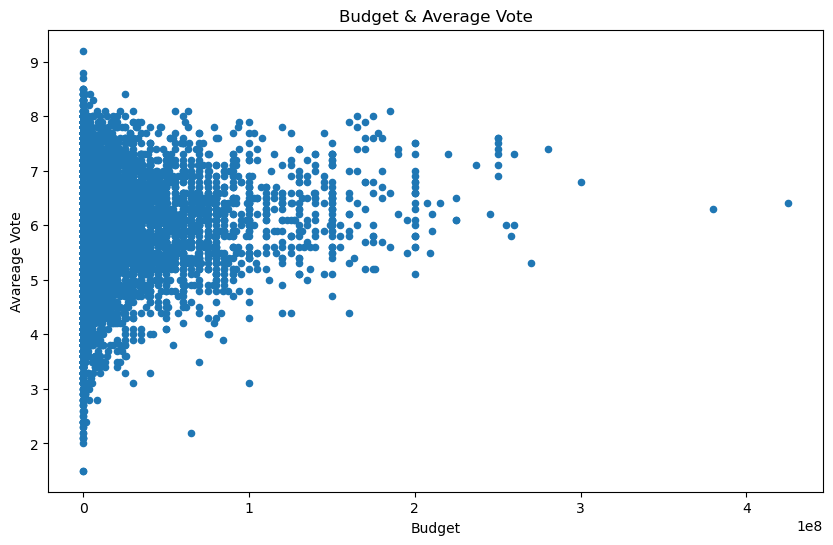

In [127]:
df.plot(x='budget', y='vote_average', kind='scatter', figsize = (10,6))

plt.title('Budget & Average Vote')
plt.xlabel('Budget')
plt.ylabel('Avareage Vote');

### Research Question 2 (Comparing the highest-grossing and lowest-grossing films in terms of box office take)

In [128]:
# reusable function to calculate lowest and highest Revenue 
def comp_profit(col):
    
    # lowest movie
    low = df[col].idxmin()
    rev_low = pd.DataFrame(df.loc[low])
    
    # highest movie
    high = df[col].idxmax()
    rev_high = pd.DataFrame(df.loc[high])
    
    result = pd.concat([rev_low, rev_high], axis=1)
    return result

# calling the function for revenue column
comp_profit('revenue')

,48,1386
popularity,2.93234,9.432768
budget,30000000,237000000
revenue,0,2781505847
original_title,Wild Card,Avatar
cast,Jason Statham|Michael Angarano|Milo Ventimigli...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Simon West,James Cameron
runtime,92,162
genres,Thriller|Crime|Drama,Action|Adventure|Fantasy|Science Fiction
release_date,2015-01-14 00:00:00,2009-12-10 00:00:00
vote_count,481,8458


### Research Question 3 (Which month saw the most movie releases over the years?)
The first division of films according to the date of production in months

In [129]:
movies_of_month = df['release_date'].dt.month.value_counts().sort_index()
movies_of_month

1      888
2      679
3      811
4      789
5      804
6      819
7      789
8      906
9     1318
10    1133
11     795
12     972
Name: release_date, dtype: int64

In order to clearly show how many films were produced each month, I also kept the names of the months in the data frame and used matplotlib to create a bar chart (horizontal bar chart).

We can infer from the chart that September and October have more releases than the other months.

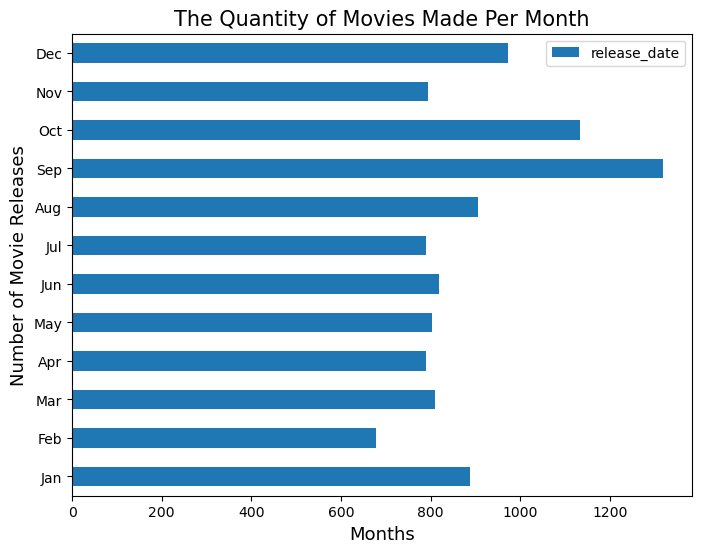

In [130]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
movies_of_month = pd.DataFrame(movies_of_month)
movies_of_month['months'] = months

movies_of_month.plot(x='months', kind='barh', figsize=(8,6))

plt.title('The Quantity of Movies Made Per Month', fontsize = 15)
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Number of Movie Releases', fontsize = 13);

### Research Question 4 (Number Of Movies For Each Year.)
We now know how many movies were made annually between 1960 and 2015, with 2014 recording the greatest total.

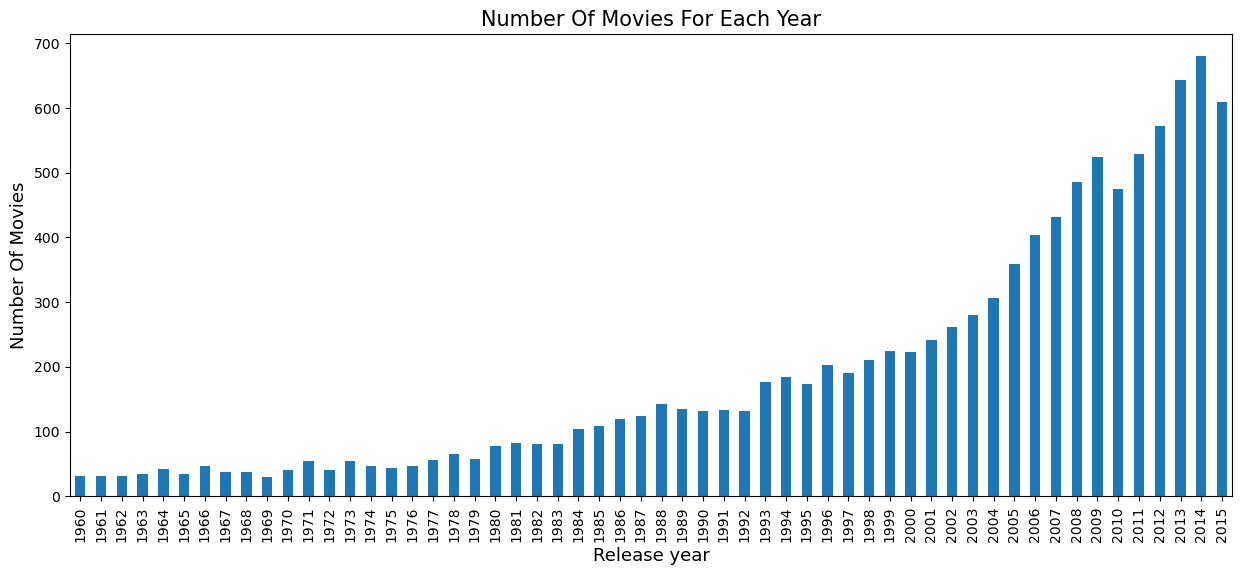

In [131]:
number_movies = df.groupby('release_year').count()['original_title']

number_movies.iloc[:].plot.bar(figsize=(15,6))

plt.title("Number Of Movies For Each Year",fontsize=15)
plt.xlabel('Release year',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13);

### Research Question 5  (The average length of each film.)
The distribution of the above Box Plot has a leftward skew,
understanding the typical runtime of movies between 80 and 115 minutes.

C:\Users\Maverick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


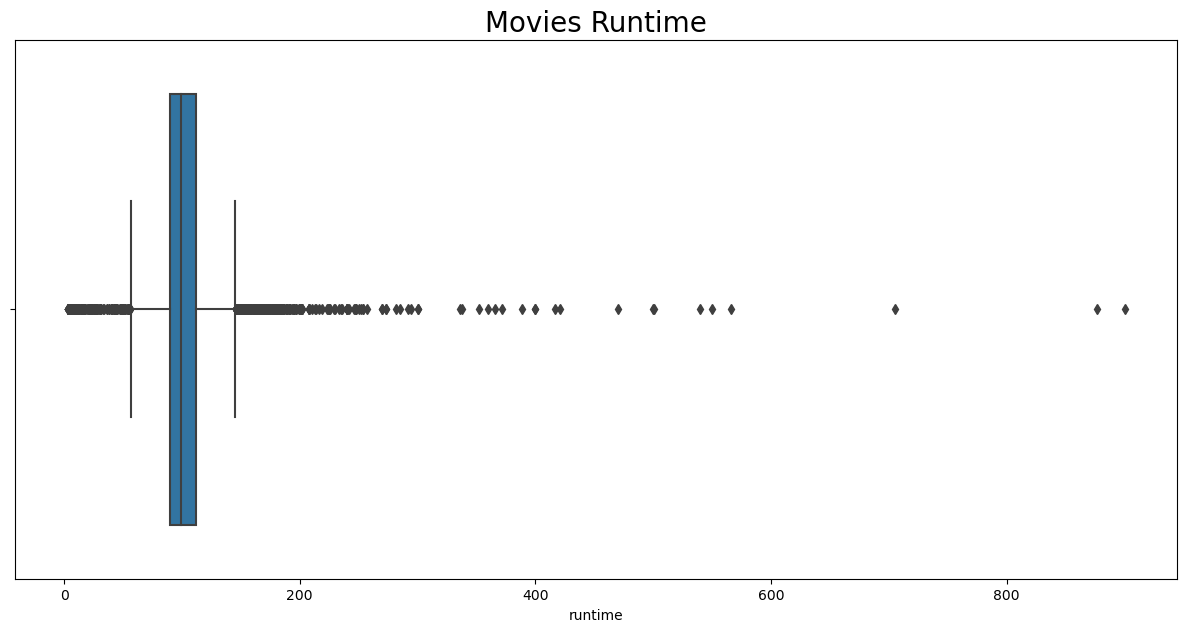

In [132]:
plt.figure(figsize=(15,7))
plt.title('Movies Runtime', fontsize=20)
sns.boxplot(df['runtime']);

<a id='conclusions'></a>
## Conclusions



1: now see that there is no connection between a movie's budget and its success, as there are low budget movies that are popular and successful.

2: Additionally, we see a comparison between the films with the highest and lowest revenue.

3: The chart indicates that there are more releases in September and October than in the other months.

4: Between 1960 and 2015, we also know how many movies were produced annually, with 2014 recording the highest total.

5: Another observation is that movies runtime for 80 to 115 minutes.

### Limitations:
    We are unsure if the information given to us is accurate, comprehensive, and current. Since the budget and income columns lack currency units, it is likely that various movies' budgets vary depending on the nation in which they were produced. Therefore, a discrepancy appears here that could render the entire analysis incorrect. The total analysis will be impacted if I drop the rows with missing values. For ease of parsing during the exploration stage.

In [133]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295